In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# The Sequences to be aligned
sequence_1 = "GCTAGCTAGCTACGTAGCGATCGTACGATGCTAGCTACGATCGTACGT"
sequence_2 = "ACGTAGCTAGCTAGCATCGATCGATCGTACGATCGATGCTAGCTAGC"

In [3]:
# Defining the constant for calculating the score
match = 1
mismatch = -1
gap = -2

# The constants for the traceback process
stop = 0
left = 1 
up = 2        
diagonal = 3  
path = 10

In [4]:
# Creating the Needleman-Wunsch algorithm

def needleman(seq1, seq2):
    rows = len(seq1) + 1
    cols = len(seq2) + 1

    scoring_matrix = np.zeros((rows, cols), dtype=int)
    traceback_matrix = np.zeros((rows, cols), dtype=int)

    # Initialize the first column and row of the matrices
    for i in range(1, rows):
        scoring_matrix[i][0] = gap * i
        traceback_matrix[i][0] = up

    for j in range(1, cols):
        scoring_matrix[0][j] = gap * j
        traceback_matrix[0][j] = left

    # Fill in the scoring and traceback matrices
    for i in range(1, rows):
        for j in range(1, cols):
            match_score = match if seq1[i - 1] == seq2[j - 1] else mismatch
            diagonal_score = scoring_matrix[i - 1, j - 1] + match_score
            vertical_score = scoring_matrix[i - 1, j] + gap
            horizontal_score = scoring_matrix[i, j - 1] + gap

            best_score = max(diagonal_score, vertical_score, horizontal_score)
            scoring_matrix[i, j] = best_score

            # Favor diagonal moves in tie-breaking
            if best_score == diagonal_score:
                traceback_matrix[i, j] = diagonal
            elif best_score == horizontal_score:
                traceback_matrix[i, j] = left
            elif best_score == vertical_score:
                traceback_matrix[i, j] = up

    # Traceback along the scoring matrix to  build the aligned sequences
    aligned_seq_1 = ""
    aligned_seq_2 = ""
    i = rows - 1
    j = cols - 1
    best_score = scoring_matrix[i, j]

    while i > 0 and j > 0:
        if traceback_matrix[i, j] == diagonal:
            aligned_seq_1 += seq1[i - 1]
            aligned_seq_2 += seq2[j - 1]
            traceback_matrix[i, j] = path
            i -= 1
            j -= 1
        elif traceback_matrix[i, j] == up:
            aligned_seq_1 += seq1[i - 1]
            aligned_seq_2 += '-'
            traceback_matrix[i, j] = path
            i -= 1
        elif traceback_matrix[i, j] == left:
            aligned_seq_1 += '-'
            aligned_seq_2 += seq2[j - 1]
            traceback_matrix[i, j] = path
            j -= 1

    # Append any remaining characters if one sequence runs out
    while i > 0:
        aligned_seq_1 += seq1[i - 1]
        aligned_seq_2 += '-'
        i -= 1

    while j > 0:
        aligned_seq_1 += '-'
        aligned_seq_2 += seq2[j - 1]
        j -= 1

    # Reverse the sequences - they were constructed from the reverse end
    aligned_seq_1 = aligned_seq_1[::-1]
    aligned_seq_2 = aligned_seq_2[::-1]

    return aligned_seq_1, aligned_seq_2, best_score, scoring_matrix, traceback_matrix

In [ ]:
# Running the function
aligned_sequence_1, aligned_sequence_2, score, score_matrix, traceback_matrix = needleman(sequence_1, sequence_2)

In [ ]:
# Creating the colour map for the alignment matrix
import matplotlib.colors as mcolors

colours = {
    0: "blue",
    1: (0.9, 0.9, 0.9),
    2: (0.9, 0.9, 0.9),
    3: (0.9, 0.9, 0.9),
    10: "red"
}

mymap = mcolors.ListedColormap([colours[val] for val in colours.keys()])
bounds = list(colours.keys()) + [max(colours.keys()) + 1]
norm = mcolors.BoundaryNorm(bounds, mymap.N)

Score = 10
Sequence 1: GC-TAGCTAGCTA-CGT--AGCGATCGTACGATGCTA-GCTACGATCGTACGT
Sequence 2: ACGTAGCTAGCTAGCATCGATCGATCGTACGAT-CGATGCTA-G--C-TA-GC


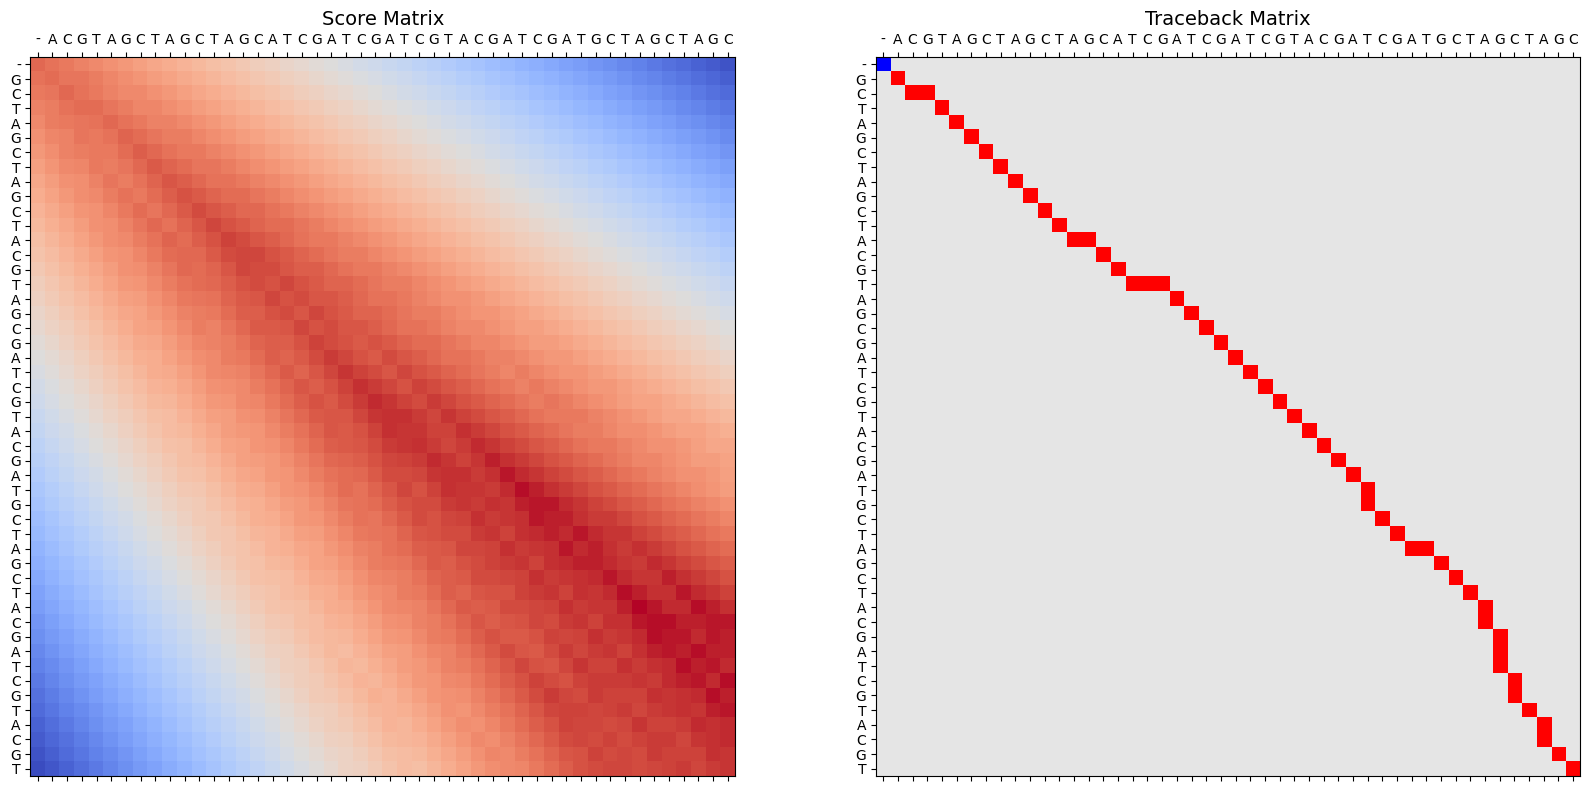

In [ ]:
# Visualise the scoring matrix and the traceback path using matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(20)
ax[0].matshow(score_matrix, cmap='coolwarm')
ax[0].set_title("Score Matrix", fontsize=14)

ax[1].matshow(traceback_matrix, cmap=mymap, norm=norm)
ax[1].set_title("Traceback Matrix", fontsize=14)

for index in range(2):
    ax[index].set_xticks(np.arange(len(sequence_2) + 1))
    ax[index].set_xticklabels(["-"] + list(sequence_2))
    ax[index].set_yticks(np.arange(len(sequence_1) + 1))
    ax[index].set_yticklabels(["-"] + list(sequence_1))

print("Score =", score)
print("Sequence 1:", aligned_sequence_1)
print("Sequence 2:", aligned_sequence_2)